# **Librerias**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 

# **Carga de datos**

In [2]:
educacion = pd.read_excel(r"C:\Users\jhost\OneDrive\Escritorio\Proyecto SAMSUNG\Primer-Proyecto-SIC\data\MINERD.xlsx")
salud = pd.read_excel(r"C:\Users\jhost\OneDrive\Escritorio\Proyecto SAMSUNG\Primer-Proyecto-SIC\data\servicio_nacional_de_salud.xlsx")
bancos = pd.read_excel(r"C:\Users\jhost\OneDrive\Escritorio\Proyecto SAMSUNG\Primer-Proyecto-SIC\data\superintendencia_de_bancos.xlsx")

c:\Users\jhost\AppData\Local\Programs\Python\Python311\Lib\site-packages\openpyxl\worksheet\header_footer.py:48: UserWarning: Cannot parse header or footer so it will be ignored
  warn("""Cannot parse header or footer so it will be ignored""")


# **Limpieza**

In [3]:
columnas = ['genero','cargo','sueldo_bruto','sueldo_neto','tabla'] #Estas son las columnas con las que nos quedaremos

educacion['tabla'] = 'educacion' # Creamos la columna tabla como identificador 
# Renombramos todas las columnas para tenerlas normalizadas 
educacion = educacion.rename(columns={"Género":"genero",
                                'Función':'cargo',
                                'Total Ingreso':'sueldo_bruto',
                                'Sueldo Neto':'sueldo_neto'})
educacion = educacion[columnas] #Filtramos las columnas que vamos a usar

salud['tabla'] = 'salud'
salud = salud.rename(columns={'SEXO':'genero',
                                'CARGO':'cargo',
                                'SUELDO BRUTO':'sueldo_bruto',
                                'SUELDO NETO':'sueldo_neto'})
salud = salud[columnas]

bancos['tabla'] = 'bancos'
bancos = bancos.rename(columns={'Género':'genero',
                                'Posición Actual':'cargo',
                                'Sueldo Bruto ':'sueldo_bruto',
                                'Sueldo  Neto ':'sueldo_neto'})
bancos = bancos[columnas]

In [4]:
# Luego de tener todas las tablas con las mismas columnas, concatenamos
df = pd.concat([educacion,salud,bancos])

In [5]:
# Eliminamos valores nulos
df = df.dropna()

In [6]:
# Filtramos la data basandonos en el sueldo minimo de RD y en un limite maximo de 100mil pesos
df = df[df['sueldo_neto'] > 19352.50]
df = df[df['sueldo_neto'] < 100000]

# **Análisis**

In [7]:
# Estadisticas basicas
df.describe()

,sueldo_bruto,sueldo_neto
count,69364.000000,69364.000000
mean,54691.008901,40681.503849
std,18313.029198,14051.993964
min,19500.000000,19352.680000
25%,40000.000000,28651.312500
50%,50833.550000,39025.375000
75%,69663.100000,50335.190000
max,213281.060000,99928.980000


In [22]:
# Esta funcion recibe el nombre de una columna y la grafica en un histograma
def freq_sueldos(columna):
    sns.histplot(data=df, x=df[columna], bins=20) # Este metodo crea el histograma
    plt.xlabel(columna) # Nombre del eje x
    plt.ylabel('Frecuencia') # Nombre del eje y
    plt.title(f'Distribución de {columna}') # Titulo general de la tabla
    plt.show()

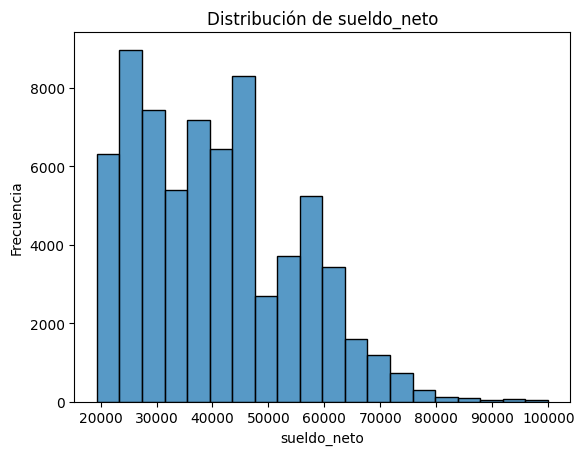

In [23]:
freq_sueldos('sueldo_neto')

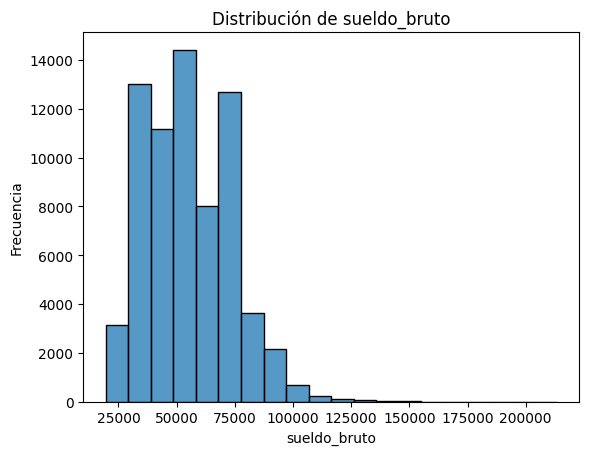

In [24]:
freq_sueldos('sueldo_bruto')

Text(0.5, 1.0, 'Cantidad de Género por Sector')

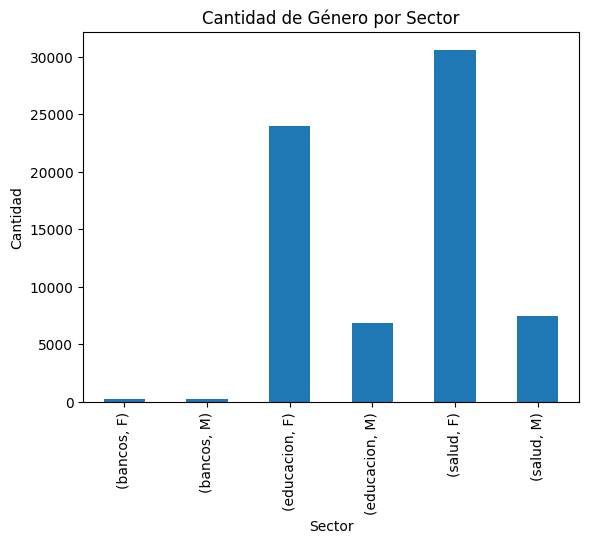

In [30]:
# Empleados por sector separados por genero
df_generos = df.groupby('tabla')['genero'].value_counts() # En una serie de Pandas guardamos la cantidad de persona por genero hay en cada sector
df_generos.plot(kind='bar') # Graficamos en diagrama de barras 
plt.xlabel('Sector') # Nombramos los ejes 
plt.ylabel('Cantidad')
plt.title('Cantidad de Género por Sector') # Titulo general 

Text(0.5, 1.0, 'Sueldo promedio por Sector')

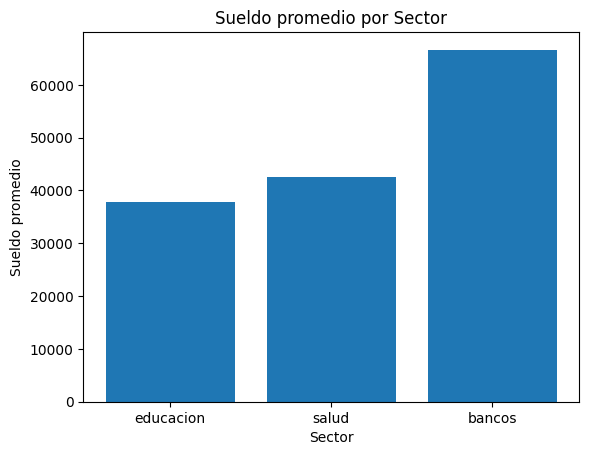

In [43]:
promedio_sn_educacion = df[df['tabla'] == 'educacion']['sueldo_neto'].mean() # Tomamos el promedio del sueldo neto de cada sector
promedio_sn_bancos = df[df['tabla'] == 'bancos']['sueldo_neto'].mean()
promedio_sn_salud = df[df['tabla'] == 'salud']['sueldo_neto'].mean()

# Guardamos los promedios en una lista para graficarlos y en otra lista, siguiendo el orden, guardamos los nombres de los sectores para que sirvan de etiqueta 
promedios_sn_sector = [promedio_sn_educacion,promedio_sn_salud,promedio_sn_bancos]
sectores = ['educacion','salud','bancos']

plt.bar(sectores,promedios_sn_sector)
plt.xlabel('Sector') # Nombramos los ejes 
plt.ylabel('Sueldo promedio')
plt.title('Sueldo promedio por Sector') # Titulo general 

Text(0.5, 1.0, 'Cargos mas frecuentes')

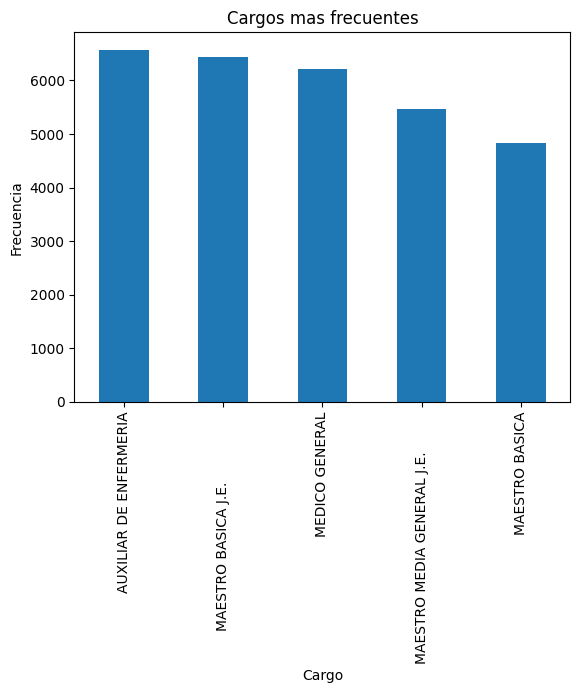

In [55]:
# 5 Cargos mas frecuentes
cargo_fq = df['cargo'].value_counts() # Contamos cuantas perdonas hay por cargo
cargo_fq = cargo_fq.head() # Sacamos un top 5
cargo_fq.plot.bar() # Graficamos con barras 
plt.xlabel('Cargo') # Nombramos los ejes 
plt.ylabel('Frecuencia')
plt.title('Cargos mas frecuentes') # Titulo general 